In [1]:
import numpy as np
import matplotlib.pyplot as plt
import firtez_dz as frz
from astropy.io import fits
from matplotlib.colors import CenteredNorm, TwoSlopeNorm

In [2]:
plt.rc('text', usetex = False)

In [56]:
atm_ori = frz.read_model('/dat/xenosh/muram_plage_pore/theta_test/muram_020000_nx1536_ny1536_nz240_d6.bin')

In [3]:
atm = frz.read_model('/dat/xenosh/muram_plage_pore/theta_test/out_muram_020000_nx1536_ny1536_nz240_d6.bin')

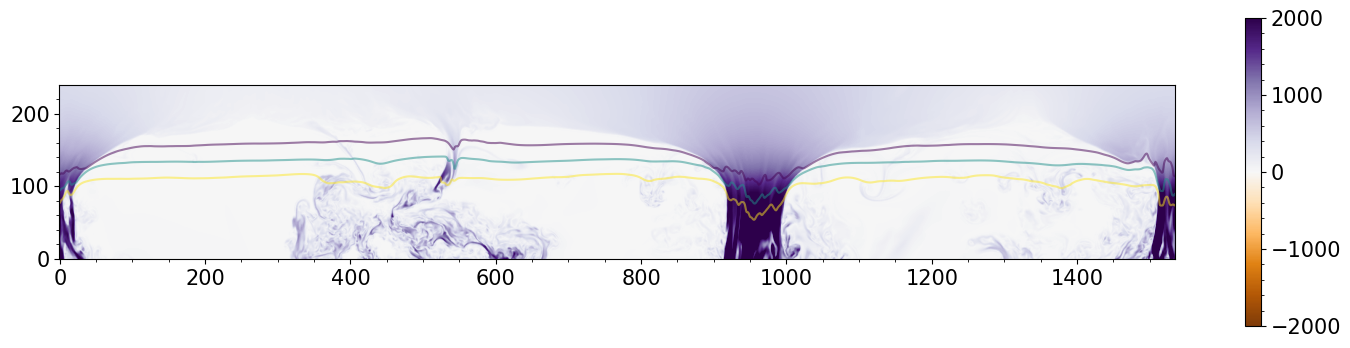

In [63]:
plt.figure(figsize=(18,4))
plt.imshow(np.sqrt(atm_ori.bx[:,756,:]**2+atm_ori.by[:,756,:]**2+atm_ori.bz[:,756,:]**2).T,origin='lower',cmap='PuOr',vmax=2000,vmin=-2000)
plt.colorbar()
plt.contour(atm_ori.tau[:,756,:].T,levels=[-2,-1,0],alpha=0.5)

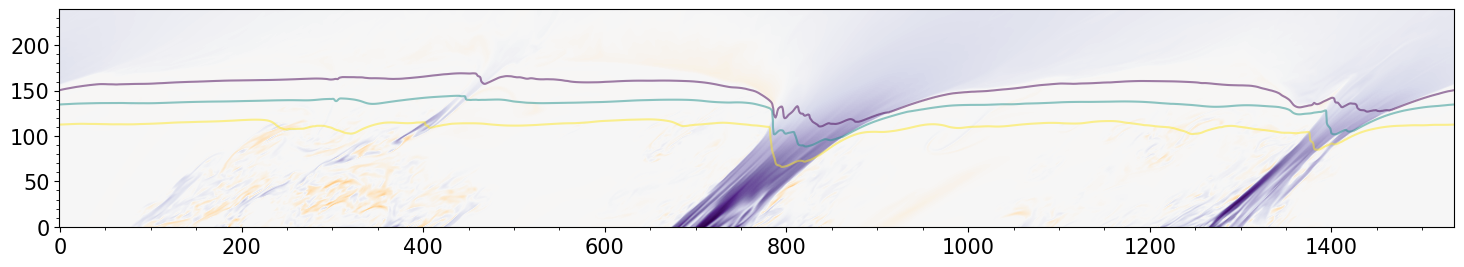

In [68]:
plt.figure(figsize=(18,4))
plt.imshow(atm.bz[:,756,:].T,origin='lower',cmap='PuOr',norm=CenteredNorm())
#plt.colorbar()
plt.contour(atm.tau[:,756,:].T,levels=[-2,-1,0],alpha=0.5)

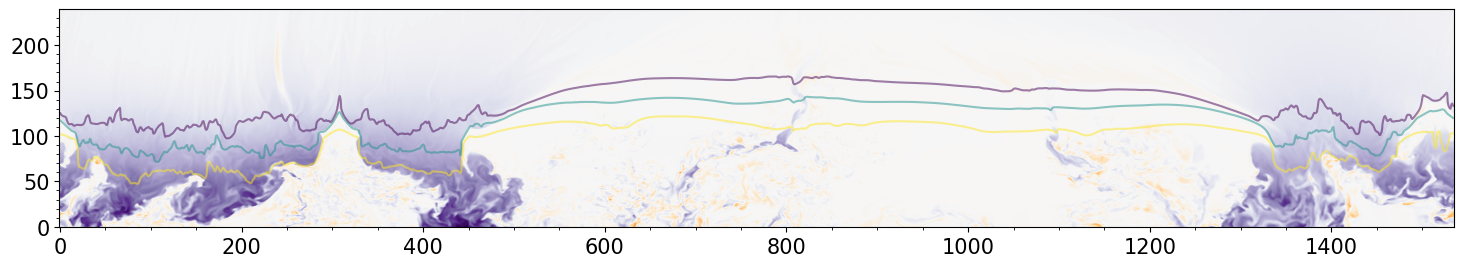

In [82]:
plt.figure(figsize=(18,4))
plt.imshow(atm.bz[350,:,:].T,origin='lower',cmap='PuOr',norm=CenteredNorm())
#plt.colorbar()
plt.contour(atm.tau[350,:,:].T,levels=[-2,-1,0],alpha=0.5)

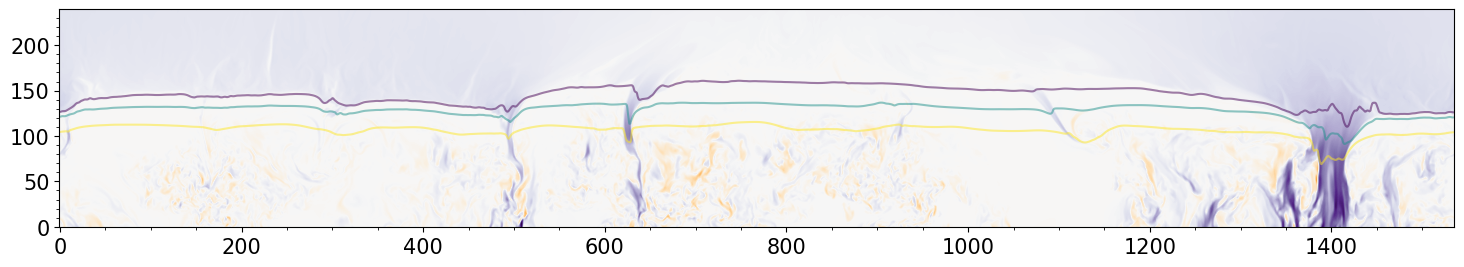

In [83]:
plt.figure(figsize=(18,4))
plt.imshow(atm_ori.bz[350,:,:].T,origin='lower',cmap='PuOr',norm=CenteredNorm())
#plt.colorbar()
plt.contour(atm_ori.tau[350,:,:].T,levels=[-2,-1,0],alpha=0.5)

In [8]:
stokes = frz.read_profile('/dat/xenosh/muram_plage_pore/theta_test/stokes.bin')

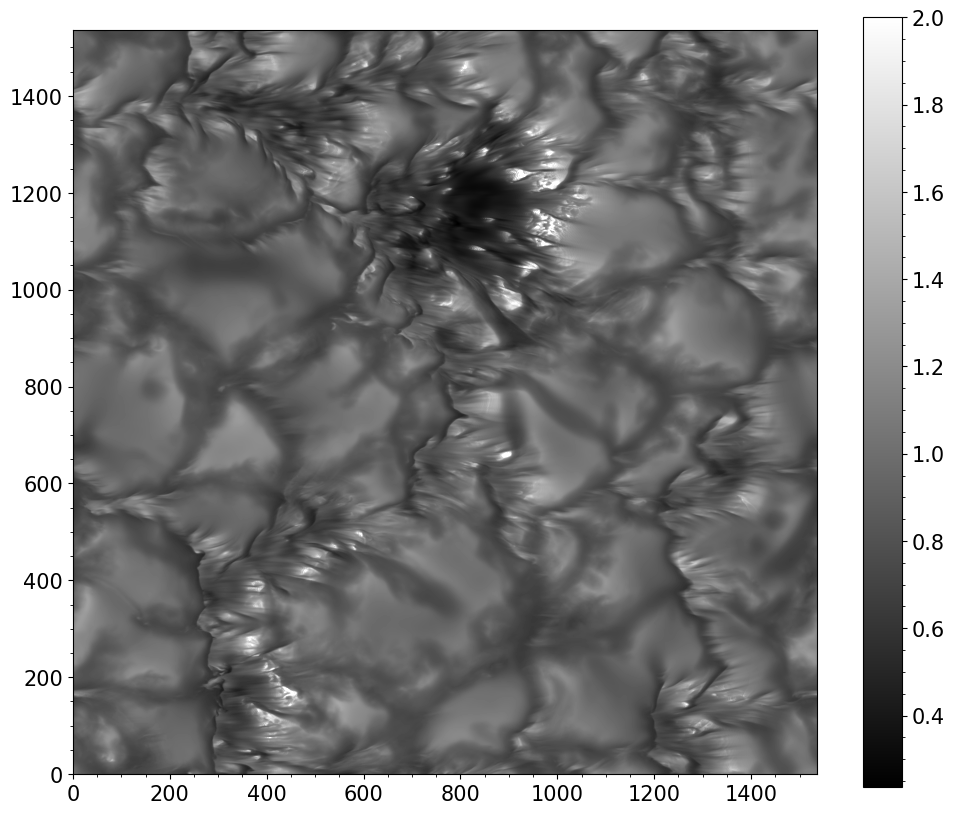

In [12]:
plt.figure(figsize=(12,10))
plt.imshow(stokes.stki[100,:,:].T,origin='lower',cmap='gray',vmax=2)
plt.colorbar()

In [14]:
np.cos(np.pi/4)

0.7071067811865476

In [17]:
np.arccos(0.85)*180/np.pi

31.78833061705162

In [65]:
# interpolate
tau_common = np.linspace(-3,1,41)
nx = atm.tem.shape[0]
ny = atm.tem.shape[1]
nz = tau_common.shape[0]
T= np.zeros((nx,ny,nz))
P= np.zeros((nx,ny,nz))
Bx= np.zeros((nx,ny,nz))
By= np.zeros((nx,ny,nz))
Bz= np.zeros((nx,ny,nz))
Vz= np.zeros((nx,ny,nz))
Bh = np.zeros((nx,ny,nz))
a = np.zeros((nz))
z = np.zeros((nx,ny,nz))
z0 = np.zeros((nx,ny,nz))
for i in range(nx):
    for j in range(ny):
        T[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.tem[i,j,::-1])
        a = np.interp(tau_common, atm.tau[i,j,::-1], np.log10(atm.pg[i,j,::-1]))
        P[i,j,:] = 10 ** a
        Bx[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.bx[i,j,::-1])
        By[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.by[i,j,::-1])
        Bz[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.bz[i,j,::-1])
        Vz[i,j,:] = np.interp(tau_common, atm.tau[i,j,::-1], atm.vz[i,j,::-1])
        Bh[i,j,:] = np.sqrt(Bx[i,j,:]**2+By[i,j,:]**2)
        z[i,j,:] = np.interp(tau_common,atm.tau[i,j,::-1],atm.z[i,j,::-1])
        z0[i,j,:] = np.interp(tau_common,atm_ori.tau[i,j,::-1],atm_ori.z[i,j,::-1])


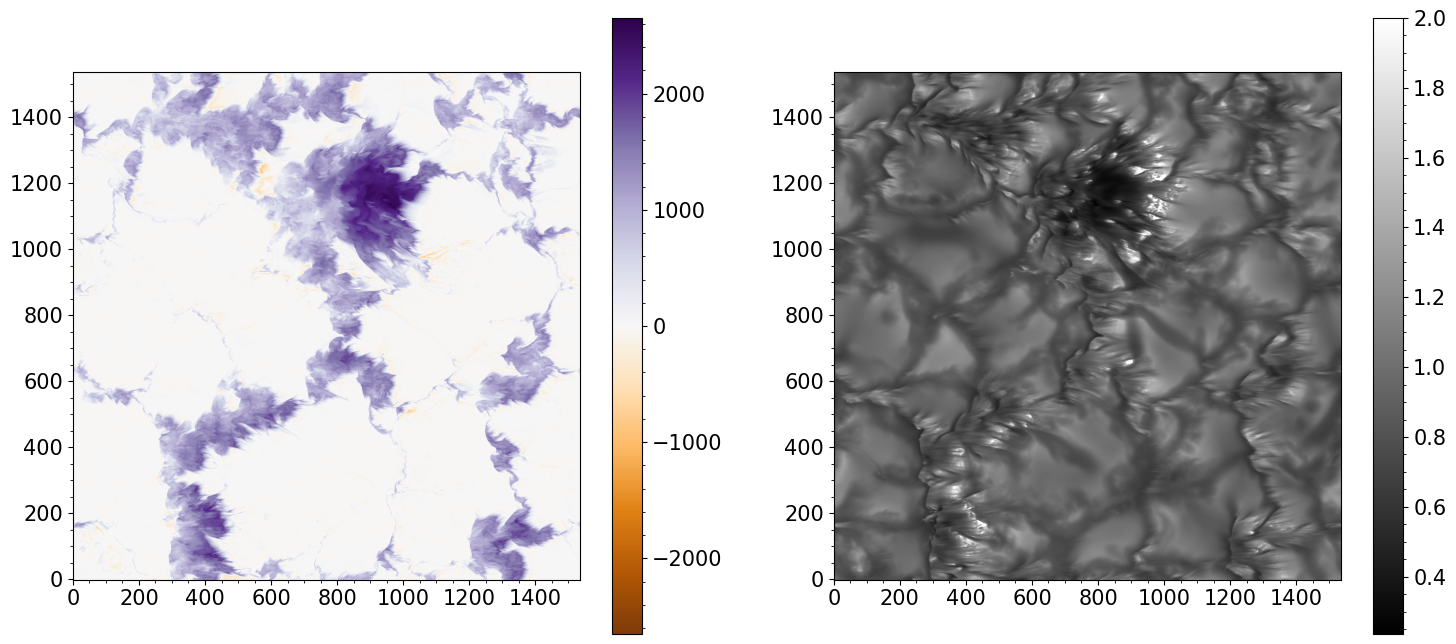

In [45]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.imshow(Bz[:,:,20].T,origin='lower',cmap='PuOr',norm=CenteredNorm())
plt.colorbar()
plt.subplot(122)
plt.imshow(stokes.stki[100,:,:].T,origin='lower',cmap='gray',vmax=2)
plt.colorbar()

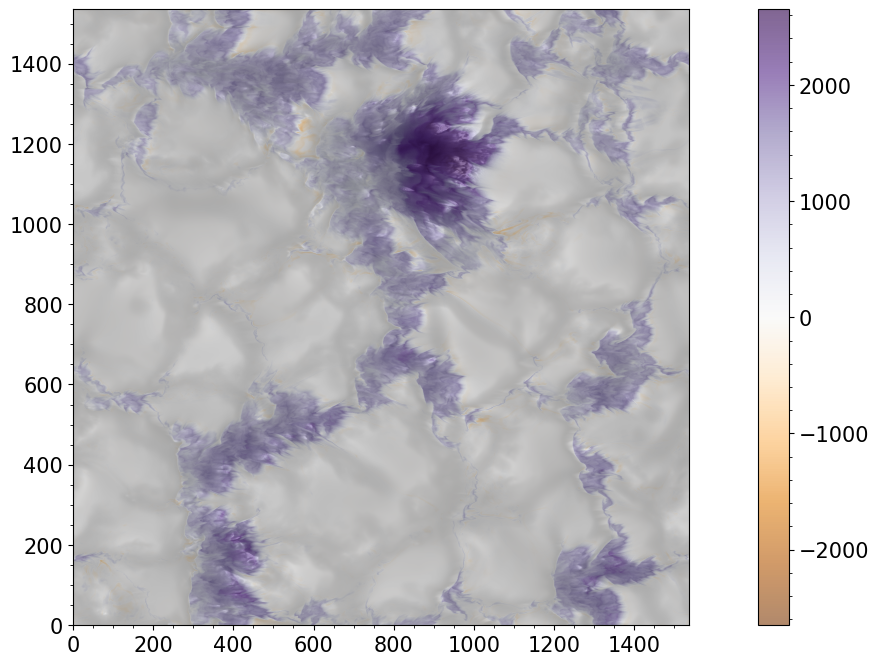

In [34]:
plt.figure(figsize=(18,8))
plt.imshow(stokes.stki[100,:,:].T,origin='lower',cmap='gray',vmax=2)
plt.imshow(Bz[:,:,20].T,origin='lower',cmap='PuOr',norm=CenteredNorm(),alpha=0.6)

plt.colorbar()

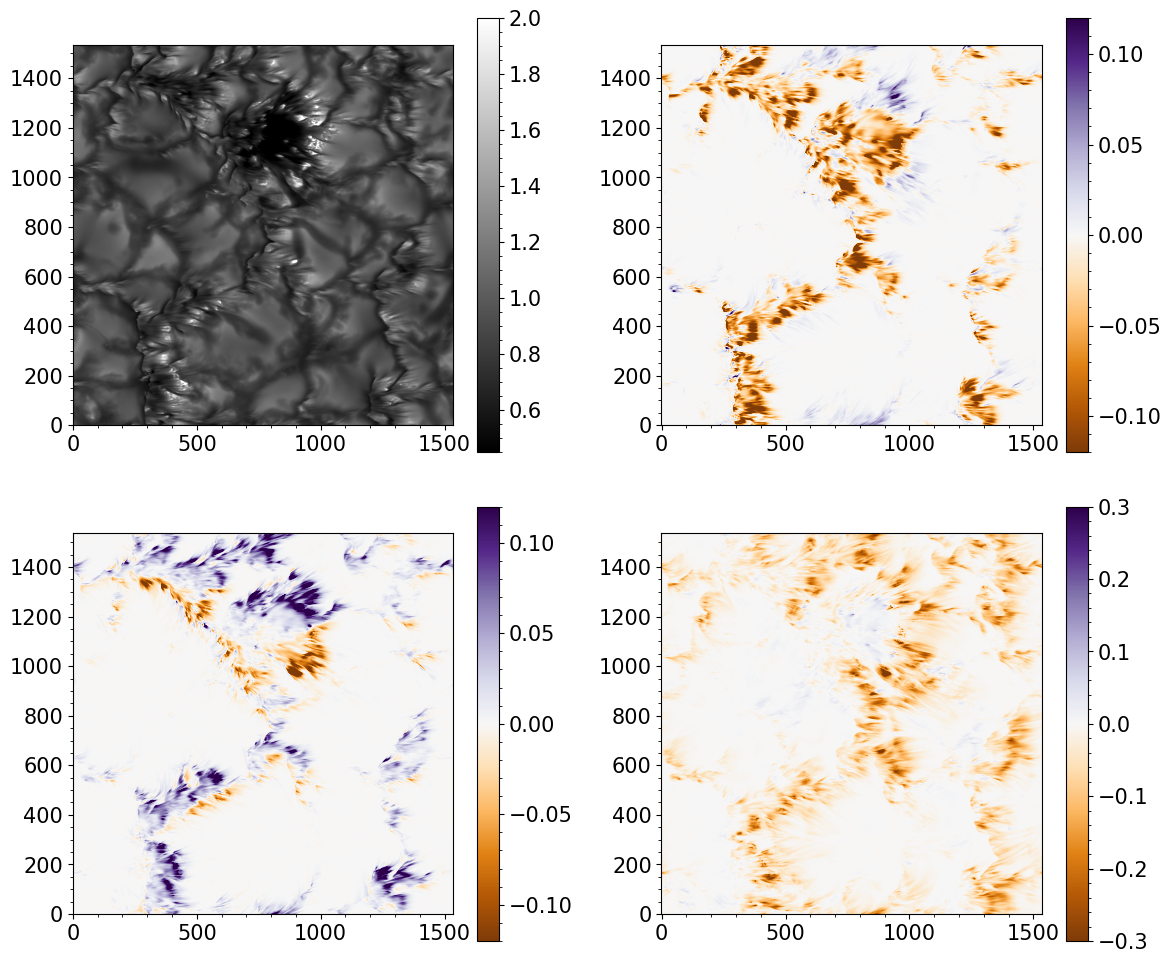

In [92]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(stokes.stki[10,:,:].T,origin='lower',cmap='gray',vmin=0.45,vmax=2)
#plt.ylabel('y [Mm]')
#plt.title('Stokes I')
plt.colorbar()
plt.subplot(222)
plt.imshow(stokes.stkq[142,:,:].T,origin='lower',cmap='PuOr',vmin=-0.12,vmax=0.12)
#plt.title('Stokes Q')
plt.colorbar()
plt.subplot(223)
plt.imshow(stokes.stku[142,:,:].T,origin='lower',cmap='PuOr',vmin=-0.12,vmax=0.12)
#plt.title('Stokes U')
#plt.xlabel('x [Mm]')
#plt.ylabel('y [Mm]')
plt.colorbar()
plt.subplot(224)
plt.imshow(stokes.stkv[147,:,:].T,origin='lower',cmap='PuOr',vmin=-0.3,vmax=0.3)
#plt.title('Stokes V')
#plt.xlabel('x [Mm]')
plt.colorbar()
plt.tight_layout()
#plt.savefig('stkmap.png',bbox_inches='tight')
#plt.savefig('stkmap.eps',bbox_inches='tight')

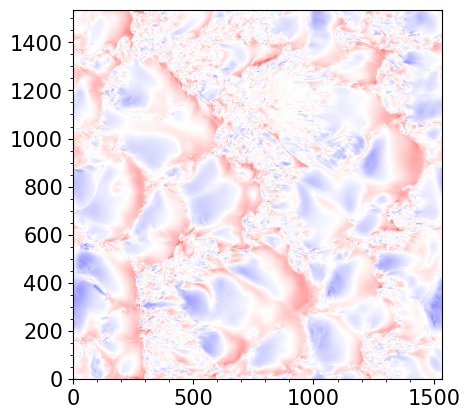

In [40]:
plt.imshow(Vz[:,:,20].T,origin='lower',cmap='bwr',norm=CenteredNorm())

In [74]:
gamma = np.arccos(atm.bz/np.sqrt(atm.bx**2+atm.by**2+atm.bz**2))*180/np.pi
gamma0 = np.arccos(atm_ori.bz/np.sqrt(atm_ori.bx**2+atm_ori.by**2+atm_ori.bz**2))*180/np.pi

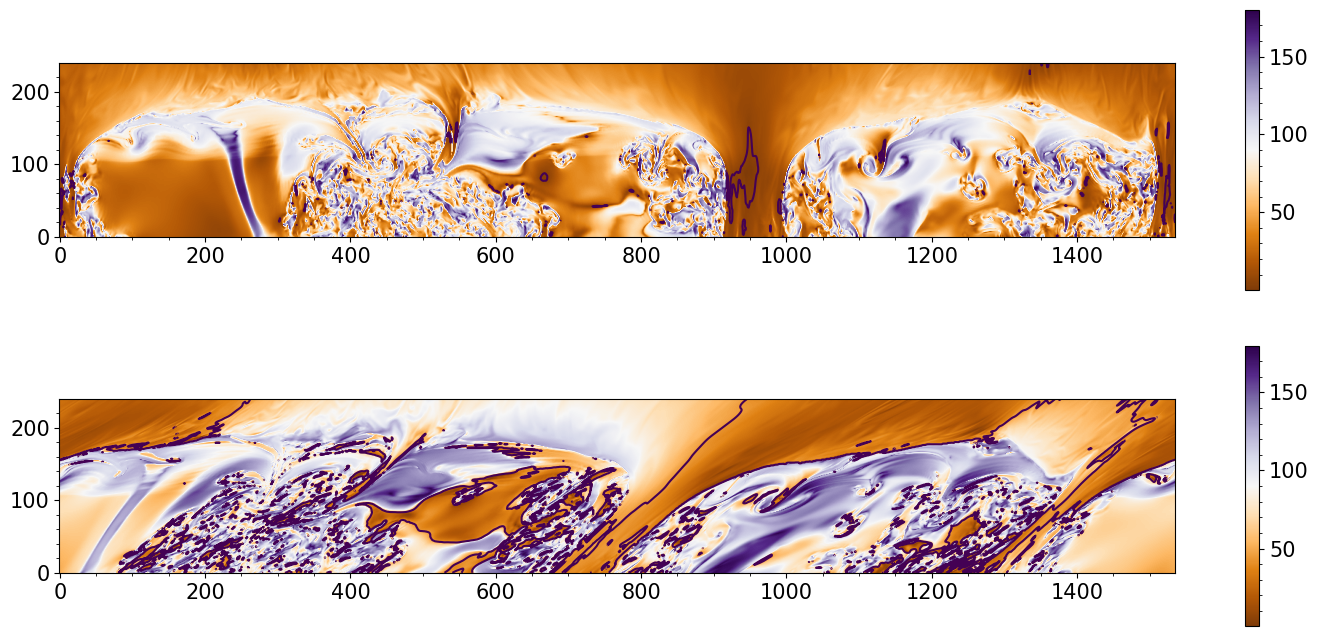

In [88]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.imshow(gamma0[:,756,:].T,origin='lower',cmap='PuOr')
plt.colorbar()
plt.contour(gamma0[:,756,:].T,levels=[5])
plt.subplot(212)
plt.imshow(gamma[:,756,:].T,origin='lower',cmap='PuOr')
plt.colorbar()
plt.contour(gamma[:,756,:].T,levels=[45])

In [67]:
print(np.mean(z[:,:,30]))
print(np.mean(z0[:,:,30]))

855.6993816766461
587.6337985628928


Text(0.5, 1.0, '45')

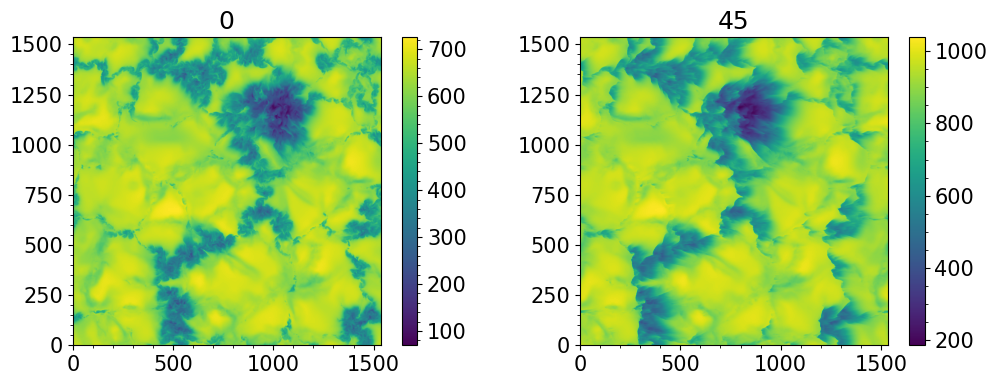

In [69]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(z0[:,:,30].T,origin='lower')
plt.colorbar()
plt.title('0')
plt.subplot(122)
plt.imshow(z[:,:,30].T,origin='lower')
plt.colorbar()
plt.title('45')

In [70]:
print(np.mean(z[200:600,600:1000,30]))
print(np.mean(z0[200:600,600:1000,30]))

951.0820798199795
660.2933428095458


In [71]:
print(np.mean(z[200:600,600:1000,30])-np.mean(z[:,:,30]))
print(np.mean(z0[200:600,600:1000,30])-np.mean(z0[:,:,30]))

95.38269814333341
72.65954424665301
